In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

data=pd.read_csv(r'C:\\Users\\LasimaSN\\Downloads\\The Data Science Course 2020 - All Resources\\Part_5_Advanced_Statistical_Methods_(Machine_Learning)\S38_L261\Countries-exercise.csv')
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


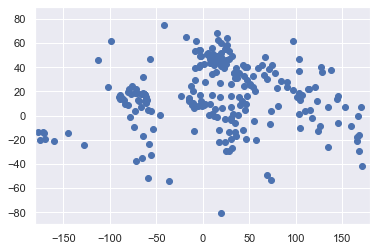

In [3]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [4]:
x=data.iloc[:,1:3]
x
km=KMeans(2)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
identify_clusters=km.fit_predict(x)

In [7]:
data_new=data.copy()
data_new['Clusters']=identify_clusters
data_new

,name,Longitude,Latitude,Clusters
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,0
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,1
237,Yemen,47.586762,15.909280,0
238,South Africa,25.083901,-29.000341,0
239,Zambia,27.774759,-13.458242,0


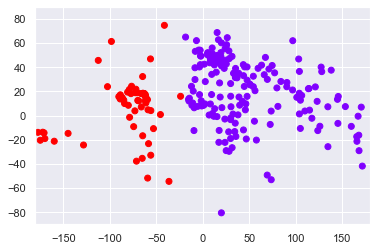

In [8]:
plt.scatter(data['Longitude'],data['Latitude'],c=data_new['Clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [11]:
wcss=[]
for i in range (1,11):
    km=KMeans(i)
    km.fit(x)
    wcss_init=km.inertia_
    wcss.append(wcss_init)
wcss

[1413859.6798344273,
 657012.0797586325,
 325235.52237055893,
 256631.9187391475,
 192194.9829002524,
 152133.99386588598,
 126758.35414179866,
 103661.56900038902,
 84927.05022223276,
 76571.81780508837]

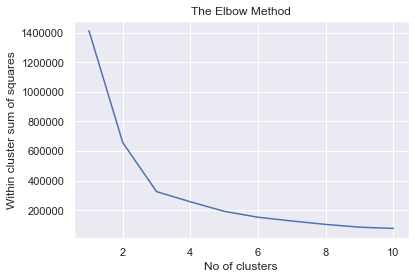

In [13]:
number_cluster=range(1,11)
plt.plot(number_cluster,wcss)
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()